<a href="https://colab.research.google.com/github/mahdaalma/ALMA-/blob/main/ARIMAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA

In [1]:
!pip install PythonTsa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from PythonTsa.plot_acf_pacf import acf_pacf_fig
from scipy.stats import boxcox,  boxcox_llf
from statsmodels.stats.diagnostic import het_arch

import warnings

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 6.7 MB/s eta 0:00:00


In [16]:
#Data IHSG dan Variabel Makroekonomi
IHSG=pd.read_csv('https://raw.githubusercontent.com/mahdaalma/ALMA-/main/data_ihsg_2007_2024-2.csv', sep=',')
IHSG.head(10)

,Date,Open,High,Low,Close,AdjClose,Volume,Inflasi,Kurs Jual,Kurs Beli,Kurs Tengah
0,1/31/2007,1813.45,1843.35,1627.76,1757.26,1757.19,501642800,6.26%,9111.818182,9021.181818,9066.500000
1,2/28/2007,1765.87,1824.99,1664.20,1740.97,1740.90,482985200,6.30%,9112.850000,9022.750000,9067.800000
2,3/31/2007,1752.11,1833.42,1692.22,1830.92,1830.85,445107500,6.52%,9209.952381,9117.952381,9163.952381
3,4/30/2007,1837.18,2021.01,1837.18,1999.17,1999.09,486833700,6.29%,9142.900000,9052.200000,9097.550000
4,5/31/2007,1995.17,2111.83,1987.89,2084.32,2084.24,550720100,6.01%,8888.476190,8800.190476,8844.333333
5,6/30/2007,2100.68,2167.45,2045.58,2139.28,2139.19,517207000,5.77%,9028.550000,8938.750000,8983.650000
6,7/31/2007,2140.62,2405.96,2140.62,2348.67,2348.58,376941900,6.06%,9112.363636,9021.909091,9067.136364
7,8/31/2007,2318.70,2322.80,1863.36,2194.34,2194.25,550133600,6.51%,9413.545455,9319.818182,9366.681818
8,9/30/2007,2194.43,2385.24,2192.79,2359.21,2359.11,891354100,6.95%,9356.500000,9263.300000,9309.900000
9,10/31/2007,2366.61,2689.92,2366.61,2643.49,2643.38,876734500,6.88%,9152.705882,9061.411765,9107.058824


In [17]:
#memeriksa tipe data
IHSG.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
AdjClose,float64
Volume,int64
Inflasi,object
Kurs Jual,float64
Kurs Beli,float64


In [18]:
#mengubah type data menjadi datetime
IHSG['Date'] = pd.to_datetime(IHSG['Date'], format='%m/%d/%Y') # Changed the format string to '%m/%d/%Y'

In [19]:
#memeriksa tipe data
IHSG.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64
AdjClose,float64
Volume,int64
Inflasi,object
Kurs Jual,float64
Kurs Beli,float64


# PREPROCESSING

In [21]:
# Bersihkan kolom Inflasi dari tanda '%', ubah ke float
IHSG['Inflasi'] = IHSG['Inflasi'].str.replace('%', '').astype(float)

# Sortir berdasarkan tanggal dan jadikan index
IHSG = IHSG.sort_values('Date')
IHSG.set_index('Date', inplace=True)

# Pilih kolom yang dibutuhkan
data = IHSG[['Close', 'Inflasi', 'Kurs Tengah']].dropna()

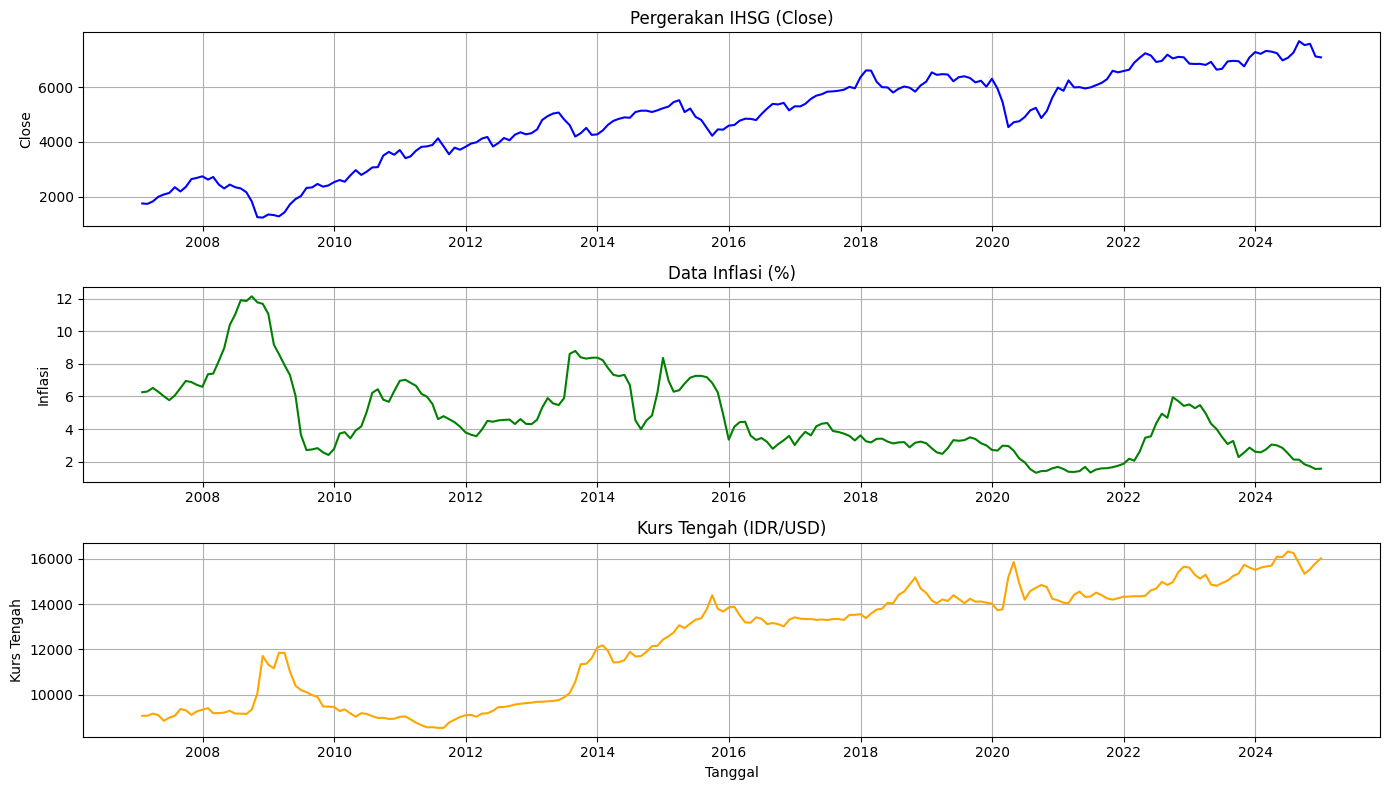

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

# Plot Close
plt.subplot(3, 1, 1)
plt.plot(data.index, data['Close'], color='blue')
plt.title('Pergerakan IHSG (Close)')
plt.ylabel('Close')
plt.grid(True)

# Plot Inflasi
plt.subplot(3, 1, 2)
plt.plot(data.index, data['Inflasi'], color='green')
plt.title('Data Inflasi (%)')
plt.ylabel('Inflasi')
plt.grid(True)

# Plot Kurs Tengah
plt.subplot(3, 1, 3)
plt.plot(data.index, data['Kurs Tengah'], color='orange')
plt.title('Kurs Tengah (IDR/USD)')
plt.ylabel('Kurs Tengah')
plt.xlabel('Tanggal')
plt.grid(True)

plt.tight_layout()
plt.show()

# CCF PLOT ANTAR VARIABEL

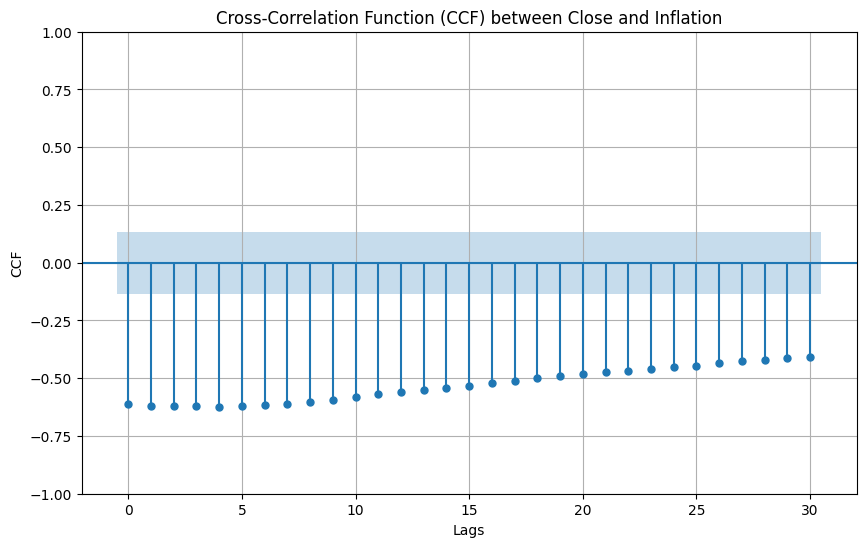

In [24]:
# prompt: BUAT PLOT CCF ANTARA CLOSE DAN INFLASI

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_ccf

# Calculate and plot the CCF
fig, ax = plt.subplots(figsize=(10, 6))
plot_ccf(data['Close'], data['Inflasi'], lags=30, ax=ax) # Adjust lags as needed
ax.set_title('Cross-Correlation Function (CCF) between Close and Inflation')
ax.set_xlabel('Lags')
ax.set_ylabel('CCF')
plt.grid(True)
plt.show()


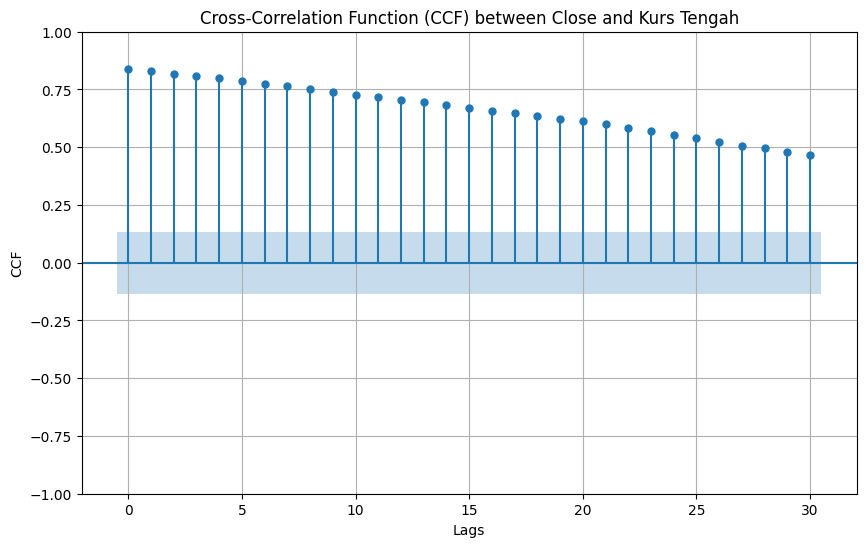

In [25]:
# prompt: BUAT PLOT CCF UNTUK CLOSE DAN KURS TENGAH

import matplotlib.pyplot as plt
# ... (Your existing code)

# Calculate and plot the CCF between Close and Kurs Tengah
fig, ax = plt.subplots(figsize=(10, 6))
plot_ccf(data['Close'], data['Kurs Tengah'], lags=30, ax=ax) # Adjust lags as needed
ax.set_title('Cross-Correlation Function (CCF) between Close and Kurs Tengah')
ax.set_xlabel('Lags')
ax.set_ylabel('CCF')
plt.grid(True)
plt.show()


# SPLITING DATA TRAINING DAN TESTING

In [48]:
# Split di akhir 2022
train = data[:'2022']
test = data['2023':]

y_train = train['Close']
y_test = test['Close']
x_train = train[['Inflasi', 'Kurs Tengah']]
x_test = test[['Inflasi', 'Kurs Tengah']]

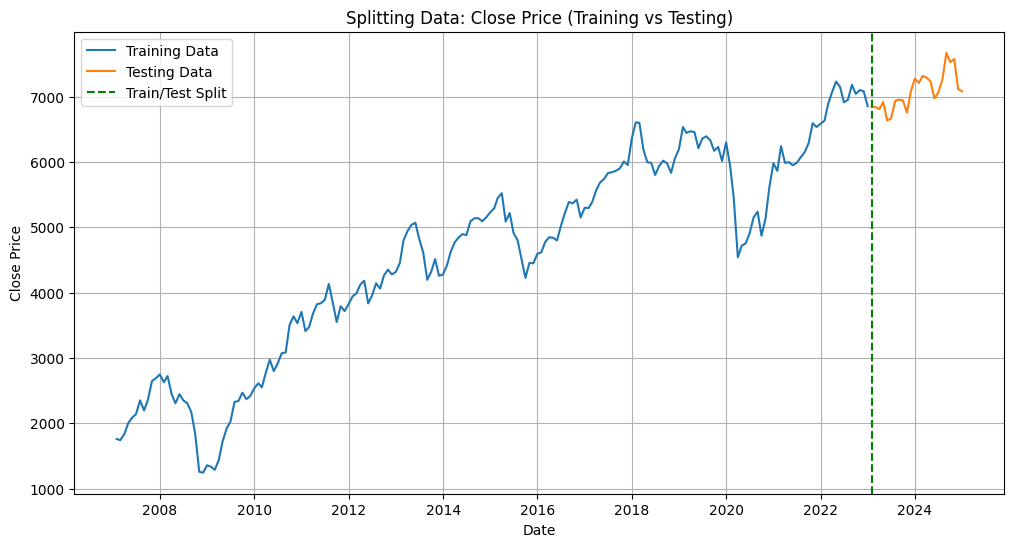

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train, label='Training Data')
plt.plot(y_test.index, y_test, label='Testing Data')
plt.axvline(x=y_test.index[0], color='green', linestyle='--', label='Train/Test Split') # Changed to y_test.index[0]
plt.title('Splitting Data: Close Price (Training vs Testing)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [50]:
# Display the first 10 rows of the training data
print("Training Data (first 10 rows):")
print(train.head(10))

# Display the first 10 rows of the testing data
print("\nTesting Data (first 10 rows):")
print(test.head(10))


Training Data (first 10 rows):
              Close  Inflasi  Kurs Tengah
Date                                     
2007-01-31  1757.26     6.26  9066.500000
2007-02-28  1740.97     6.30  9067.800000
2007-03-31  1830.92     6.52  9163.952381
2007-04-30  1999.17     6.29  9097.550000
2007-05-31  2084.32     6.01  8844.333333
2007-06-30  2139.28     5.77  8983.650000
2007-07-31  2348.67     6.06  9067.136364
2007-08-31  2194.34     6.51  9366.681818
2007-09-30  2359.21     6.95  9309.900000
2007-10-31  2643.49     6.88  9107.058824

Testing Data (first 10 rows):
              Close  Inflasi  Kurs Tengah
Date                                     
2023-01-31  6839.34     5.28  15295.23810
2023-02-28  6843.24     5.47  15126.00000
2023-03-31  6805.28     4.97  15300.71429
2023-04-30  6915.72     4.33  14866.71429
2023-05-31  6633.26     4.00  14810.85738
2023-06-30  6661.88     3.52  14932.00029
2023-07-31  6931.36     3.08  15039.75000
2023-08-31  6953.26     3.27  15245.13659
2023-09-30  69

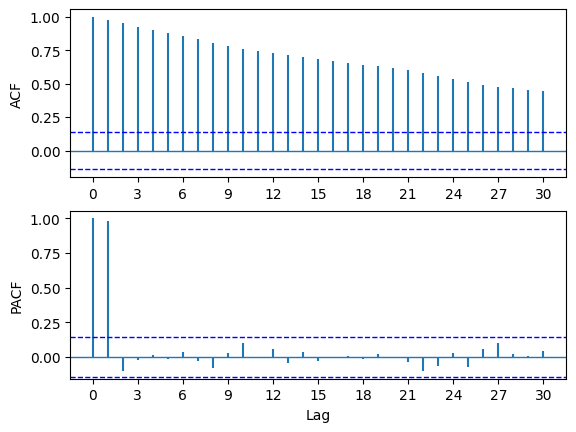

In [53]:
#Plot acf dan pacf data train
acf_pacf_fig(y_train, both=True, lag=30); plt.show()

In [52]:
#ADF DATA TRAIN
from statsmodels.tsa.stattools import adfuller

result = adfuller(y_train, autolag='AIC')
p_value = float(result[1])
print("p-value:", p_value)

p-value: 0.6062732078052089


# STASIONERITAS

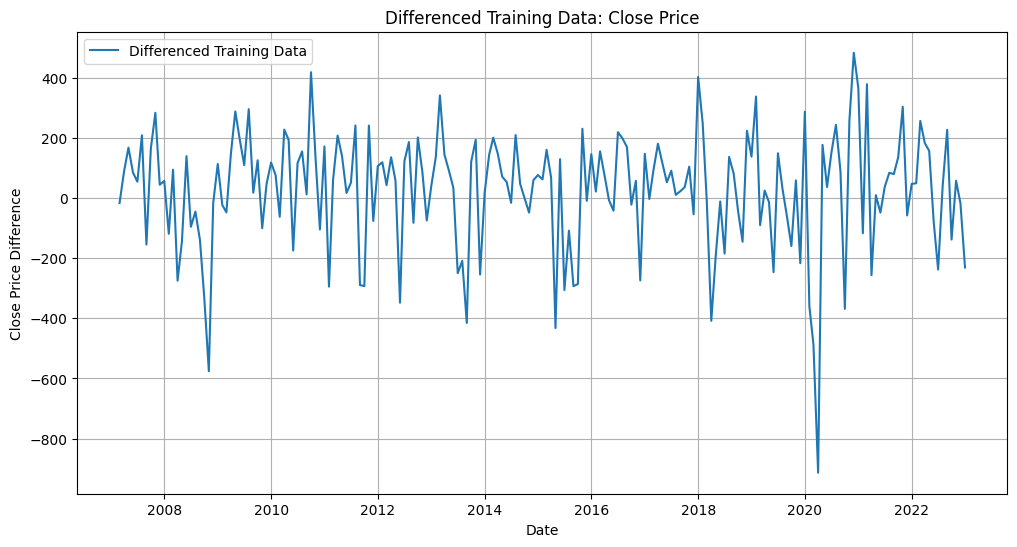

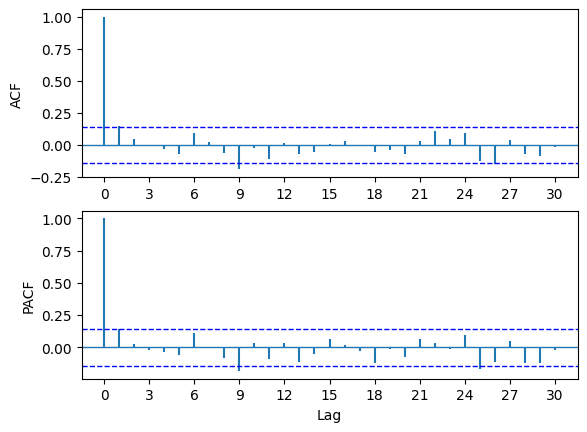

p-value (differenced data): 9.653970894328986e-22


In [54]:
# prompt: lakukan differencing data y_train

import matplotlib.pyplot as plt
# Calculate the difference of the y_train series
y_train_diff = y_train.diff().dropna()

# Plot the differenced series
plt.figure(figsize=(12, 6))
plt.plot(y_train_diff.index, y_train_diff, label='Differenced Training Data')
plt.title('Differenced Training Data: Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price Difference')
plt.legend()
plt.grid(True)
plt.show()

# Plot ACF and PACF of the differenced data
acf_pacf_fig(y_train_diff, both=True, lag=30); plt.show()

# Perform ADF test on the differenced data
result_diff = adfuller(y_train_diff, autolag='AIC')
p_value_diff = float(result_diff[1])
print("p-value (differenced data):", p_value_diff)


Lambda Box-Cox (setelah differencing): 1.763856980052713


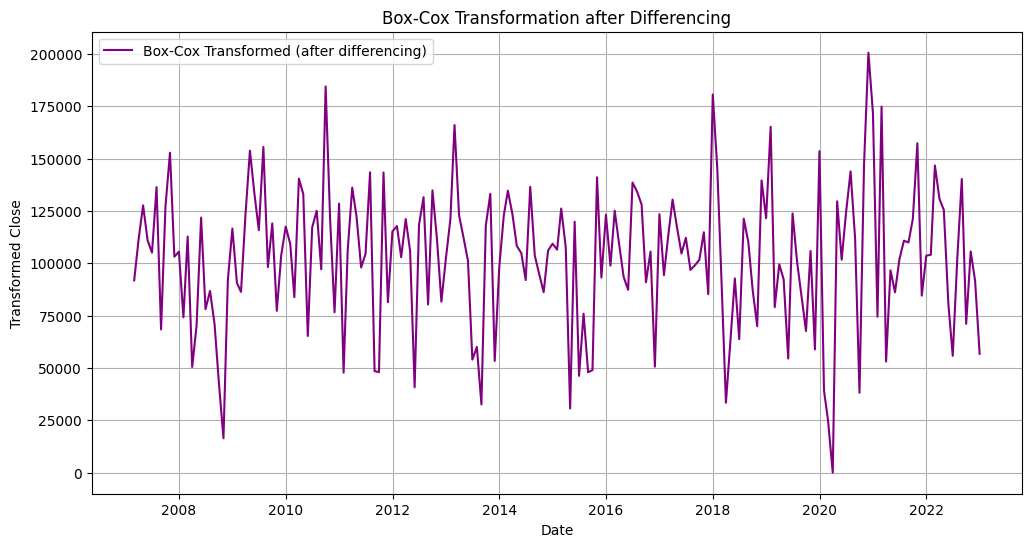

In [62]:
from scipy.stats import boxcox, boxcox_normmax
import matplotlib.pyplot as plt

# Geser data differenced agar semua nilai > 0
y_diff_shifted = y_train_diff + abs(min(y_train_diff)) + 1

# Estimasi lambda terbaik
lambda_boxcox_diff = boxcox_normmax(y_diff_shifted, method='mle')
print("Lambda Box-Cox (setelah differencing):", lambda_boxcox_diff)

# Transformasi Box-Cox
y_diff_boxcox = boxcox(y_diff_shifted, lmbda=lambda_boxcox_diff)

# Plot hasil transformasi Box-Cox
plt.figure(figsize=(12, 6))
plt.plot(y_train_diff.index, y_diff_boxcox, label='Box-Cox Transformed (after differencing)', color='purple')
plt.title('Box-Cox Transformation after Differencing')
plt.xlabel('Date')
plt.ylabel('Transformed Close')
plt.legend()
plt.grid(True)
plt.show()

In [65]:
from statsmodels.stats.diagnostic import het_arch

# Melakukan uji ARCH terhadap data yang telah didifferencing
arch_test_result = het_arch(y_train_diff)

# Tampilkan hasil
arch_stat = arch_test_result[0]
arch_pvalue = arch_test_result[1]

print(f"Statistik ARCH: {arch_stat}")
print(f"p-value: {arch_pvalue}")

# Interpretasi
if arch_pvalue < 0.05:
    print("Terdapat gejala heteroskedastisitas (varian tidak konstan).")
else:
    print("Tidak terdapat gejala heteroskedastisitas (varian konstan / stasioner terhadap ragam).")

Statistik ARCH: 12.731439602887832
p-value: 0.2390773477332434
Tidak terdapat gejala heteroskedastisitas (varian konstan / stasioner terhadap ragam).


# ARIMA

## IDENTIFIKASI MODEL TERBAIK

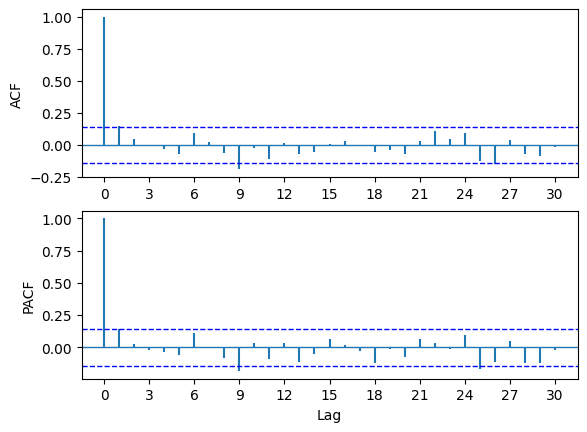

In [66]:
# prompt: plot acf dan pacf hasil differencing

import matplotlib.pyplot as plt
# Plot ACF and PACF of the differenced data
acf_pacf_fig(y_train_diff, both=True, lag=30); plt.show()


Dari hasil tersebut, maka model tentatif yang dapat di uji adalah
*   ARIMA (0,1,1)
*   ARIMA (1,1,0)

## ARIMA (0,1,1)

In [90]:
#MODEL MA(1)
model_ma1 = ARIMA(y_train_diff, order=(0,0,1)).fit()
print(model_ma1.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  191
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1276.706
Date:                Sat, 12 Apr 2025   AIC                           2559.412
Time:                        16:46:34   BIC                           2569.169
Sample:                    02-28-2007   HQIC                          2563.364
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.5842     18.007      1.476      0.140      -8.709      61.877
ma.L1          0.1343      0.062      2.173      0.030       0.013       0.255
sigma2      3.744e+04   3428.712     10.921      0.0

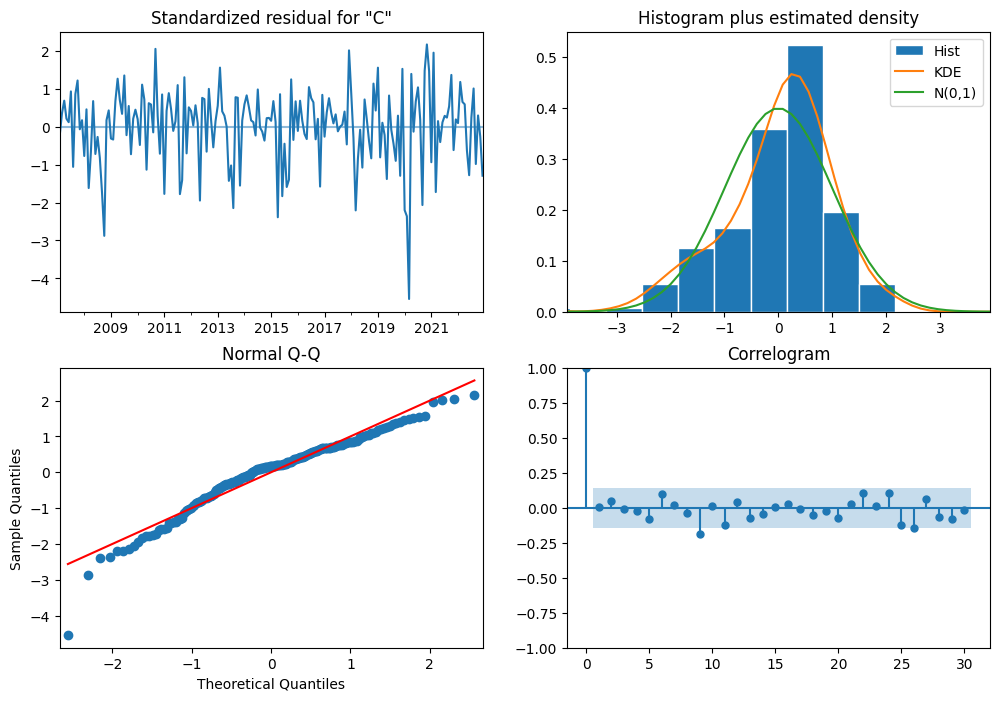


=== UJI STATISTIK RESIDUAL (MA1) ===
Uji Autokorelasi (ARCH Test) - p-value: 0.13725932047413292
Uji Keacakan Residual (Ljung-Box Test) - Statistic: 35.20173074162213 p-value: 0.23537425278684218
Uji Normalitas (Shapiro-Wilk) - Statistic: 0.9540555147053441 p-value: 7.571166557608908e-06
Uji Normalitas (Jarque-Bera) - JB Statistic: 50.86954428730272 p-value: 8.991223836199695e-12


In [93]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from scipy.stats import shapiro, jarque_bera, norm
from statsmodels.graphics.tsaplots import plot_acf

# === 1. PLOT DIAGNOSTIK RESIDUAL ===
model_ma1.plot_diagnostics(figsize=(12, 8), lags=30)
plt.show()

# === 2. UJI STATISTIK RESIDUAL ===
print("\n=== UJI STATISTIK RESIDUAL (MA1) ===")

# 2.1 UJI AUTOKORELASI (ARCH Test)
arch_pvalue = het_arch(model_ma1.resid, nlags=10)[1]
print("Uji Autokorelasi (ARCH Test) - p-value:", arch_pvalue)

# 2.2 UJI KEACAKAN (Ljung-Box Test)
ljungbox_result = acorr_ljungbox(model_ma1.resid, lags=[30], return_df=True)
print("Uji Keacakan Residual (Ljung-Box Test) - Statistic:", ljungbox_result['lb_stat'].values[0],
      "p-value:", ljungbox_result['lb_pvalue'].values[0])

# 2.3 UJI NORMALITAS (Shapiro-Wilk)
shapiro_stat, shapiro_pval = shapiro(model_ma1.resid)
print("Uji Normalitas (Shapiro-Wilk) - Statistic:", shapiro_stat, "p-value:", shapiro_pval)

# 2.4 UJI NORMALITAS (Jarque-Bera)
jb_stat, jb_pval = jarque_bera(model_ma1.resid)
print("Uji Normalitas (Jarque-Bera) - JB Statistic:", jb_stat, "p-value:", jb_pval)


## ARIMA (1,1,0)

In [94]:
#MODEL AR(1)
model_ar1 = ARIMA(y_train_diff, order=(1,0,0)).fit()
print(model_ar1.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  191
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1276.569
Date:                Sat, 12 Apr 2025   AIC                           2559.137
Time:                        16:55:14   BIC                           2568.894
Sample:                    02-28-2007   HQIC                          2563.089
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.6668     18.598      1.434      0.152      -9.784      63.117
ar.L1          0.1443      0.060      2.420      0.016       0.027       0.261
sigma2      3.758e+04   3590.844     10.465      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will be used.
  self._init_dates(dates, freq)


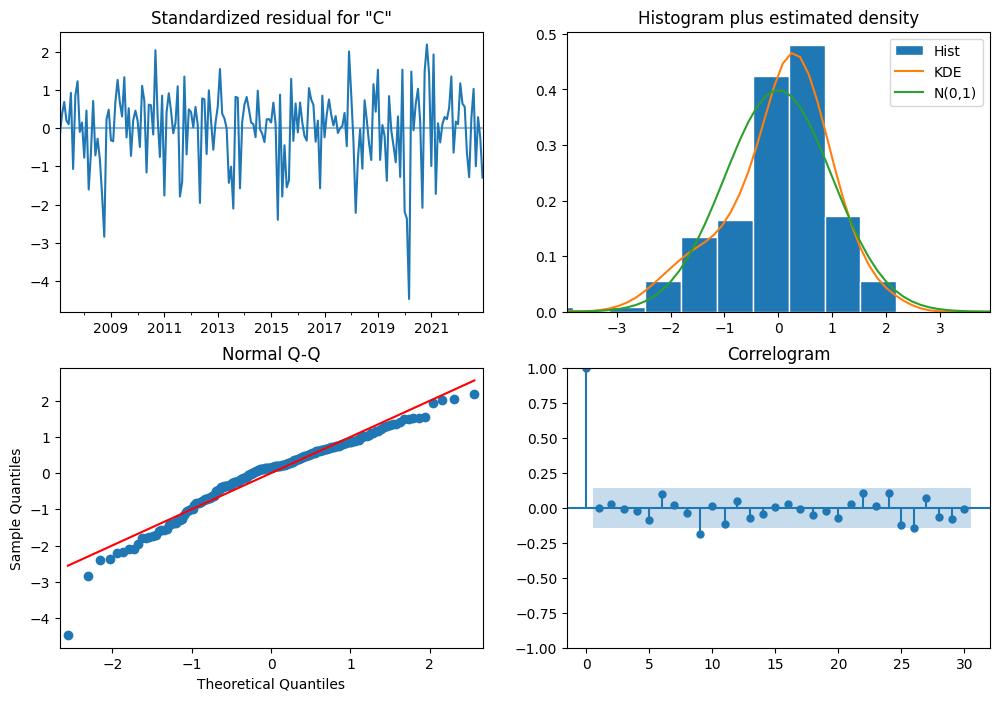


=== UJI STATISTIK RESIDUAL (AR1) ===
Uji Autokorelasi (ARCH Test) - p-value: 0.09909822276904186
Uji Keacakan Residual (Ljung-Box Test) - Statistic: 35.033818779186696 p-value: 0.24141196970288895
Uji Normalitas (Shapiro-Wilk) - Statistic: 0.9565819609786309 p-value: 1.3536975518295612e-05
Uji Normalitas (Jarque-Bera) - JB Statistic: 45.8694190253087 p-value: 1.09542390618132e-10


In [96]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from scipy.stats import shapiro, jarque_bera, norm
from statsmodels.graphics.tsaplots import plot_acf

# === 1. PLOT DIAGNOSTIK RESIDUAL ===
model_ar1.plot_diagnostics(figsize=(12, 8), lags=30)
plt.show()

# === 2. UJI STATISTIK RESIDUAL ===
print("\n=== UJI STATISTIK RESIDUAL (AR1) ===")

# 2.1 UJI AUTOKORELASI (ARCH Test)
arch_pvalue = het_arch(model_ar1.resid, nlags=10)[1]
print("Uji Autokorelasi (ARCH Test) - p-value:", arch_pvalue)

# 2.2 UJI KEACAKAN (Ljung-Box Test)
ljungbox_result = acorr_ljungbox(model_ar1.resid, lags=[30], return_df=True)
print("Uji Keacakan Residual (Ljung-Box Test) - Statistic:", ljungbox_result['lb_stat'].values[0],
      "p-value:", ljungbox_result['lb_pvalue'].values[0])

# 2.3 UJI NORMALITAS (Shapiro-Wilk)
shapiro_stat, shapiro_pval = shapiro(model_ar1.resid)
print("Uji Normalitas (Shapiro-Wilk) - Statistic:", shapiro_stat, "p-value:", shapiro_pval)

# 2.4 UJI NORMALITAS (Jarque-Bera)
jb_stat, jb_pval = jarque_bera(model_ar1.resid)
print("Uji Normalitas (Jarque-Bera) - JB Statistic:", jb_stat, "p-value:", jb_pval)


Kesimpulan Model (0,1,1) dan (1,1,0)

Memenuhi Asumsi:

	* Homoskedastisitas → Varians residual konstan (p-value > 0.05) tidak ada heteroskedastisitas.
	* Tidak ada autokorelasi signifikan → p-value > 0.05, sehingga gagal menolak H₀, yang berarti residual bersifat white noise.
	* Residual acak → p-value > 0.05, sehingga residual dianggap acak tanpa pola sistematis.

Tidak Memenuhi Asumsi:

	* Normalitas residual tidak terpenuhi → Uji Shapiro-Wilk dan Jarque-Bera menunjukkan p-value < 0.05, sehingga H₀ ditolak dan residual tidak berdistribusi normal.
	* Namun, karena jumlah data besar, berdasarkan Dalil Limit Pusat, asumsi normalitas dapat diabaikan.

Kesimpulannya Model (0,1,1) dan (1,1,0) dapat digunakan untuk baselin analisis time series.

In [99]:
# prompt: TENTUKAN NILAI AIC DAN BIC model ma1 dan ar1 bentuk dataframe

import pandas as pd
# Create a DataFrame to store AIC and BIC values
results_df = pd.DataFrame(columns=['Model', 'AIC', 'BIC'])

# Append MA(1) model results
results_df = pd.concat([results_df, pd.DataFrame([{'Model': 'MA(1)', 'AIC': model_ma1.aic, 'BIC': model_ma1.bic}])], ignore_index=True)

# Append AR(1) model results
results_df = pd.concat([results_df, pd.DataFrame([{'Model': 'AR(1)', 'AIC': model_ar1.aic, 'BIC': model_ar1.bic}])], ignore_index=True)

# Display the DataFrame
results_df

<ipython-input-99-a12c5ace7d60>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([{'Model': 'MA(1)', 'AIC': model_ma1.aic, 'BIC': model_ma1.bic}])], ignore_index=True)


,Model,AIC,BIC
0,MA(1),2559.411884,2569.168705
1,AR(1),2559.137466,2568.894286


Berdasarkan nilai AIC dan BIC  dari pemilihan model tentatif, model terbaik adalah Model ARIMA(1,1,0)

# ARIMAX